# **STUDI KASUS**

### Analisis Kinerja Penjualan dan Retur pada E-Commerce

# **Import Library**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Datasets**

In [23]:
path = "/content/ecommerce_sales_dataset.csv"
df = pd.read_csv(path)

print("Ukuran data (baris & kolom): ", df.shape, "\n")

df

Ukuran data (baris & kolom):  (5000, 18) 



,Transaction_ID,Date,Customer_ID,Product,Quantity,Payment_Method,Country,Discount_Percentage,Shipping_Cost,Delivery_Days,Customer_Rating,Return_Status,Unit_Price,Total_Price_Before_Discount,Discount_Amount,Price_After_Discount,Final_Total,Category
0,TXN_0004163,2023-01-01,CUST_00662,Router,6,Credit Card,India,0,5.0,19.0,5.0,No,247,1482,0.00,1482.00,1487.00,Networking
1,TXN_0003251,2023-01-01,CUST_00522,Hard Drive,6,Credit Card,USA,5,15.0,10.0,5.0,No,214,1284,64.20,1219.80,1234.80,Storage
2,TXN_0001138,2023-01-01,CUST_00941,Charger,3,Credit Card,USA,0,10.0,29.0,5.0,Yes,105,315,0.00,315.00,325.00,Accessories
3,TXN_0002035,2023-01-01,CUST_00799,Speaker,5,Apple Pay,USA,5,5.0,NaN,4.0,Yes,189,945,47.25,897.75,902.75,Accessories
4,TXN_0000649,2023-01-01,CUST_00388,Monitor,3,Debit Card,USA,5,25.0,25.0,NaN,No,466,1398,69.90,1328.10,1353.10,Peripherals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,TXN_0004302,2024-12-31,CUST_00785,Hard Drive,5,Debit Card,Australia,0,10.0,9.0,NaN,No,217,1085,0.00,1085.00,1095.00,Storage
4996,TXN_0001668,2024-12-31,CUST_00712,Mouse,8,Credit Card,Japan,0,5.0,9.0,2.0,No,29,232,0.00,232.00,237.00,Peripherals
4997,TXN_0002446,2024-12-31,CUST_00112,Keyboard,6,Credit Card,USA,0,15.0,20.0,5.0,No,149,894,0.00,894.00,909.00,Peripherals
4998,TXN_0001326,2024-12-31,CUST_00220,Webcam,9,Debit Card,Germany,0,20.0,20.0,4.0,No,111,999,0.00,999.00,1019.00,Peripherals


# **Business Understanding**

### Business Objective

Perusahan e-commerce ingin memahami kinerja penjualan selama 2023 hingga 2024 secara menyeluruh. Fokus utamanya adalah mengukur pertumbuhannya pendapatan, mengidentifikasi kategori dan produk dengan kontribursi tinggi. Lalu memahami faktir hubungannya dengan tingginya tingkat retur. Selain itu juga, perusahaan ingin adanya evaluasi strategi diskon, biaya pengiriman, dan waktu pengiriman terhadap kepuasan customer yang bisa diliat dengan rating. Hasil analisis ini diharapkan untuk menjadi dasar keputusan strategis sebuah perusahaan untuk meningkatkan kualitas dan pengalaman customer.

---



### Asses Situation

Datasets terdapat ada 5000 transaksi dengan rentang waktu 2 tahun dari 2023 hingga 2024. Pada datasets tersebut mencakup 15 jenis produk, 5 jenis kategori, dan 8 jenis negara. Lalu total pendapatannya mencapai 6.537.440,25. Beberapa kolom juga memiliki *missing value* pada Delivery_Days dan juga Customer_Rating. Dapat dilihat kondisi tersebut dapat diperhatikan dalam proses analisa karena dapat memengaruhi hasil. Karena dengan kosongnya data pada Delivery_Days dan Customer_Rating dapat memengaruhi analisa data lain yang memiliki hubungan dengan waktu pengiriman, kepuasan customer, dan retur.

Tantangan tersebut perlu dipahami agar hasil analisa tetap realitis dan valid sesuai dengan data yang ada.


---



In [24]:
print("Jumlah jenis produk pada transaksi:", df["Product"].nunique(), "\n")
print("Berikut daftar produknya:")
df["Product"].drop_duplicates()

Jumlah jenis produk pada transaksi: 15 

Berikut daftar produknya:


,Product
0,Router
1,Hard Drive
2,Charger
3,Speaker
4,Monitor
5,USB Cable
6,Headphones
9,Microphone
12,Mouse
13,Keyboard


In [25]:
print("Jumlah jenis kategori pada transaksi:", df["Category"].nunique(), "\n")
print("Berikut daftar kategorinya:")
df["Category"].drop_duplicates()

Jumlah jenis kategori pada transaksi: 5 

Berikut daftar kategorinya:


,Category
0,Networking
1,Storage
2,Accessories
4,Peripherals
27,Electronics


In [26]:
print("Jumlah jenis negara pada transaksi:", df["Country"].nunique(), "\n")
print("Berikut daftar negaranya:")
df["Country"].drop_duplicates()

Jumlah jenis negara pada transaksi: 8 

Berikut daftar negaranya:


,Country
0,India
1,USA
5,Germany
8,UK
9,Canada
11,Japan
14,Australia
19,France


In [27]:
print( "Berikut hasil total pendapatan pada datasets tersebut: ", df["Final_Total"].sum())

Berikut hasil total pendapatan pada datasets tersebut:  6537440.25


### Analytic Goals

Tujuan dari analisa ini agar dapat mengidentifikasi tren pendapatan dan membandingkan performa. Analisa ini juga dilakukan agar dapat mengevaluasi kontribusi per-kategori dan produk terhadap total pendapatan dan tingkat retur. Hubungan antar diskon, nilai transaksi, biaya pengiriman, dan waktu pengiriman terhadap retur akan dianalisa lebih lanjut untuk menemukan pola risiko pada data tersebut. Selain itu, analisa rating customer akan digunakan untuk memahami faktor yang memengaruhi kepuasan dan loyalitas. Hasil akhir dari tujuan ini diharapkan dapat mampu menghasilkan *insight* yang dapat di eksekusi (action) oleh manajemen.

---



### Project Plan

Rencana projek ini dimulai dengan data *loading* dan pemeriksaaan kualitas data untuk memastikan konsistensi dan struktural dataset. Tahap berikutnya adalah dengan melakukan pembersihan data, termasuk konversi tipe tanggal, dan penanganan *missing value*. Selanjutnya mengeksplorasi data dilakukan untuk memahami distribusi nilai transaksi, diskon, ongkos pengiriman, dan *delivery days*. Lalu visualisasi akan digunakan untuk menampilkan tren pendaoatan, kontribusi per kategori dan produk, serta analisa retur. Terakhir yaitu implementasi dari insight dan penyusunan rekomendasi strategi bisnis yang relevan berdasarkan analisis.

---



# **Data Understanding**

### Struktur Data

In [28]:
print("Berikut untuk struktur data datasets:", "\n")
df.info()

Berikut untuk struktur data datasets: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               5000 non-null   object 
 1   Date                         5000 non-null   object 
 2   Customer_ID                  5000 non-null   object 
 3   Product                      5000 non-null   object 
 4   Quantity                     5000 non-null   int64  
 5   Payment_Method               5000 non-null   object 
 6   Country                      5000 non-null   object 
 7   Discount_Percentage          5000 non-null   int64  
 8   Shipping_Cost                5000 non-null   float64
 9   Delivery_Days                4768 non-null   float64
 10  Customer_Rating              4750 non-null   float64
 11  Return_Status                5000 non-null   object 
 12  Unit_Price                   5000 no

1. Transaction_ID:
        Jumlah baris: 5000
        Tipe data: object
        Deskripsi: ID unik untuk setiap transaksi

2. Date:
        Jumlah baris: 5000
        Tipe data: object
        Deskripsi: Tanggal transaksi

3. Customer_ID:
        Jumlah baris: 5000
        Tipe data: object
        Deskripsi: ID unik pelanggan

4. Product:
        Jumlah baris: 5000
        Tipe data: object
        Deskripsi: Nama produk yang dibeli

5. Quantity:
        Jumlah baris: 5000
        Tipe data: int64
        Deskripsi: Jumlah unit yang dibeli dalam satu transaksi

6. Payment_Method:
        Jumlah baris: 5000
        Tipe data: object
        Deskripsi: Metode pembayaran yang digunakan

7. Country:
        Jumlah baris: 5000
        Tipe data: object
        Deskripsi: Negara asal transaksi

8. Discount_Percentage:
        Jumlah baris: 5000
        Tipe data: int64
        Deskripsi: Persentase diskon yang diberikan

9. Shipping_Cost:
        Jumlah baris: 5000
        Tipe data: float64
        Deskripsi: Biaya pengiriman

10. Delivery_Days:
        Jumlah baris: 4768
        Tipe data: float64
        Deskripsi: Lama waktu pengiriman

11. Customer_Rating:
        Jumlah baris: 4750
        Tipe data: float64
        Deskripsi: Rating yang diberikan customer

12. Return_Status:
        Jumlah baris: 5000
        Tipe data: object
        Deskripsi: Status pengembalian barang

13. Unit_Price:
        Jumlah baris: 5000
        Tipe data: int64
        Deskripsi: Harga satuan produk

14. Total_Price_Before_Discount:
        Jumlah baris: 5000
        Tipe data: int64
        Deskripsi: Total harga sebelum diskon

15. Discount_Amount:
        Jumlah baris: 5000
        Tipe data: float64
        Deskripsi: Jumlah nominal diskon

16. Price_After_Discount:
        Jumlah baris: 5000
        Tipe data: float64
        Deskripsi: Harga setelah diskon sebelum biaya tambahan

17. Final_Total:
        Jumlah baris: 5000
        Tipe data: float64
        Deskripsi: Total akhir yang dibayarkan customer

18. Category:
        Jumlah baris: 5000
        Tipe data: object
        Deskripsi: Kategori produk

### Statistik Deskriptif

In [29]:
print("Berikut merupakan statistik deskriptif datasets:")
df.describe()

Berikut merupakan statistik deskriptif datasets:


,Quantity,Discount_Percentage,Shipping_Cost,Delivery_Days,Customer_Rating,Unit_Price,Total_Price_Before_Discount,Discount_Amount,Price_After_Discount,Final_Total
count,5000.000000,5000.000000,5000.000000,4768.000000,4750.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,4.979600,5.022000,12.592000,15.185822,4.130947,272.908000,1365.791800,70.89575,1294.896050,1307.488050
std,2.561347,6.173908,7.589668,8.367771,1.119756,293.120632,1793.381955,170.69200,1701.676309,1701.813429
min,1.000000,0.000000,0.000000,1.000000,1.000000,-38.000000,-315.000000,-36.40000,-315.000000,-300.000000
25%,3.000000,0.000000,5.000000,8.000000,4.000000,86.000000,274.000000,0.00000,260.225000,273.750000
50%,5.000000,0.000000,15.000000,15.000000,4.000000,156.000000,742.000000,0.00000,699.250000,710.700000
75%,7.000000,10.000000,20.000000,23.000000,5.000000,370.250000,1512.000000,62.40000,1449.700000,1461.750000
max,9.000000,20.000000,25.000000,29.000000,5.000000,1099.000000,9891.000000,1789.20000,9693.000000,9718.000000


**1.   Count**

      Dapat dilihat dari statistik deskriptif tersebut
      menunjukkan sebagian besar memiliki 5000 baris tapi

      *   Delivery_Days hanya 4768 baris
      *   Customer_Rating hanya 4750 baris

      Hal ini menunjukkan adanya missing values pada kedua kolom tersebut.

**2.   Mean vs Median**

*   Quantity

    *   Mean: 4,98
    *   Median: 5
    
    Nilai rata-rata hampir sama dengan nilai mediannya menunjukkan distribusinya relatif simetris yang berarti mayoritas customer membeli sekitar 5 item per transaksi.


*   Discount_Percentage

    *   Mean: 5,02
    *   Median: 0

    Dengan nilai median 0 menunjukkan 50% atau lebih transaksi tidak mendapatkan diskon. Namun rata-ratanya 5% menunjukkan adanya sebagaian transaksi mendapatkan diskon besar.

*   Unit_Price

    *   Mean: 272,91
    *   Median: 156

    Nilai rata-rata jauh lebih tinggi dari nilai median menunjukkan adanya produk dengan harga sangat tinggi yang memengaruhi rata-rata.

*   Final Total

    *   Mean: 1307,49
    *   Median: 710,7

    Dapat dilihat sebagian besar transaksi memiliki nilai di sekitar 710,7, tetapi terdapat sejumlah transaksi bernilai sangat besar yang menarik rata-rata naik hingga 1307,49.


**3.   Min & Max**

*   Quantity

    *   Min: 1
    *   Max: 9
    
    Rentang tersebut cukup realistis yang berarti tidak ada pembelian dalam jumlah extrem.


*   Discount_Percentage

    *   Min: 0%
    *   Max: 20%

    Hal itu menunjukkan bahwa diskon terjadi antara 0% hingga 20% yang dimana cukup normal.

*   Unit_Price

    *   Min: -38
    *   Max: 1099

    Nilai minimum negatif (-38) tidak logis untuk harga satuan produk yang kemungkinan terjadi adalah kesalahan input data atau produk refund.

*   Total_Price_Before_Discount

    *   Min: -315
    *   Max: 9891

    Nilai negatif menunjukkan adanya transaksi refund atau koreksi transaksi dan nilai maksimum hampir 10.000 menunjukkan adanya transaksi bernilai sangat besar.


**4.   Standar Deviasi (std) - Variabilitas Data**

*   Quantity

    *   Mean: 4,98
    *   Std: 2,56
    
    Standar deviasi sekitar beda setengah dari mean, menunjukkan variasi pembelian cukup moderat.


*   Total_Price_Before_Discount

    *   Mean: 1365,79
    *   Std: 1793,38

    Standar deviasi jauh lebih besar dari mean. Ini menunjukkan nilai transaksi sangat tidak stabil dan terdapat transaksi ekstrem bernilai sangat tinggi

*   Unit_Price

    *   Mean: 272,91
    *   Std: 293,12

    Standar deviasi lebih besar dari mean, menunjukkan variasi harga produk sangat tinggi.

*   Final Total

    *   Mean: 1307,49
    *   Std: 1701,67

    Variasi nilai akhir transaksi sangat besar.
---



### Tipe Data

In [30]:
print("Berikut untuk meriksa tipe data setiap kolom pada datasets:")
df.dtypes

Berikut untuk meriksa tipe data setiap kolom pada datasets:


,0
Transaction_ID,object
Date,object
Customer_ID,object
Product,object
Quantity,int64
Payment_Method,object
Country,object
Discount_Percentage,int64
Shipping_Cost,float64
Delivery_Days,float64


Dapat dilihat tipe data dari semua kolom sudah sesuai kecuali pada kolom Date yang bertipe data object yang harusnya tipe datanya Date bukan Object. Pengecekan ini dilakukan agar saat ngevisualisasi serta insight yang akan dibuat itu akurat.

---



### Incosistent Values

**1.   Date**


In [31]:
print("Berikut untuk meriksa Incosistent Values Pada Kolom Date:")
print(df['Date'].unique())

Berikut untuk meriksa Incosistent Values Pada Kolom Date:
['2023-01-01' '2023-01-02' '2023-01-03' '2023-01-04' '2023-01-05'
 '2023-01-06' '2023-01-07' '2023-01-08' '2023-01-09' '2023-01-10'
 '2023-01-11' '2023-01-12' '2023-01-13' '2023-01-14' '2023-01-15'
 '2023-01-16' '2023-01-17' '2023-01-18' '2023-01-19' '2023-01-20'
 '2023-01-21' '2023-01-22' '2023-01-23' '2023-01-24' '2023-01-25'
 '2023-01-26' '2023-01-27' '2023-01-28' '2023-01-29' '2023-01-30'
 '2023-01-31' '2023-02-01' '2023-02-02' '2023-02-03' '2023-02-04'
 '2023-02-05' '2023-02-06' '2023-02-07' '2023-02-08' '2023-02-09'
 '2023-02-10' '2023-02-11' '2023-02-12' '2023-02-13' '2023-02-14'
 '2023-02-15' '2023-02-16' '2023-02-17' '2023-02-18' '2023-02-19'
 '2023-02-20' '2023-02-21' '2023-02-22' '2023-02-23' '2023-02-24'
 '2023-02-25' '2023-02-26' '2023-02-27' '2023-02-28' '2023-03-01'
 '2023-03-02' '2023-03-03' '2023-03-04' '2023-03-05' '2023-03-06'
 '2023-03-07' '2023-03-08' '2023-03-09' '2023-03-10' '2023-03-11'
 '2023-03-12' '202

Dapat dilihat pada kolom Date saat diperiksa *Incosistent Values*-nya, bahwa kolom tersebut konsisten datanya, jadi pada kolom tersebut
aman karena tidak memiliki *Incosistent Values.* Dapat dilihat dari outputnya semua data yang formatnya konsisten menggunakan (yyyy/mm/dd), dengan menggunakan numerik semua.

---



**1.   Category**


In [32]:
print("Berikut untuk meriksa Incosistent Values Pada Kolom Category:")
print(df['Category'].unique())

Berikut untuk meriksa Incosistent Values Pada Kolom Category:
['Networking' 'Storage' 'Accessories' 'Peripherals' 'Electronics']


Dapat dilihat pada kolom Category saat diperiksa *Incosistent Values*-nya, bahwa kolom tersebut konsisten datanya, jadi pada kolom tersebut
aman karena tidak memiliki *Incosistent Values.* Dapat dilihat dari outputnya: Networking, Storage, Accessories, Peripherals, dan Electronics. Dari segi penulisan per satu kata sudah konsisten.

---



### Missing Values

In [33]:
print("Berikut merupakan jumlah missing value per kolomnya:")
pd.DataFrame(df.isna().sum())

Berikut merupakan jumlah missing value per kolomnya:


,0
Transaction_ID,0
Date,0
Customer_ID,0
Product,0
Quantity,0
Payment_Method,0
Country,0
Discount_Percentage,0
Shipping_Cost,0
Delivery_Days,232


Dapat dilihat dari output tersebut menunjukkan baha pada kolom Delivery_Days dan Customer_Rating memiliki missing values yang cukup besar.


1.   Delivery_Days missing values: 232
2.   Customer_Rating missing values: 250



---



### Duplicated Values

In [34]:
df[df.duplicated()]

,Transaction_ID,Date,Customer_ID,Product,Quantity,Payment_Method,Country,Discount_Percentage,Shipping_Cost,Delivery_Days,Customer_Rating,Return_Status,Unit_Price,Total_Price_Before_Discount,Discount_Amount,Price_After_Discount,Final_Total,Category


Berdasarkan pada output tersebut tidak ditemukan data yang terduplikasi secara keseluruhan pada datasetsnya.

---



### Outlier Values

In [45]:
print("Berikut merupakan menampilkan jumlah outliers per kolom:")

results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers))
  results.append({'Kolom': col, 'Jumlah Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Berikut merupakan menampilkan jumlah outliers per kolom:


Kolom,Jumlah Outliers
Quantity,0
Discount_Percentage,0
Shipping_Cost,0
Delivery_Days,0
Customer_Rating,489
Unit_Price,570
Total_Price_Before_Discount,585
Discount_Amount,636
Price_After_Discount,575
Final_Total,576


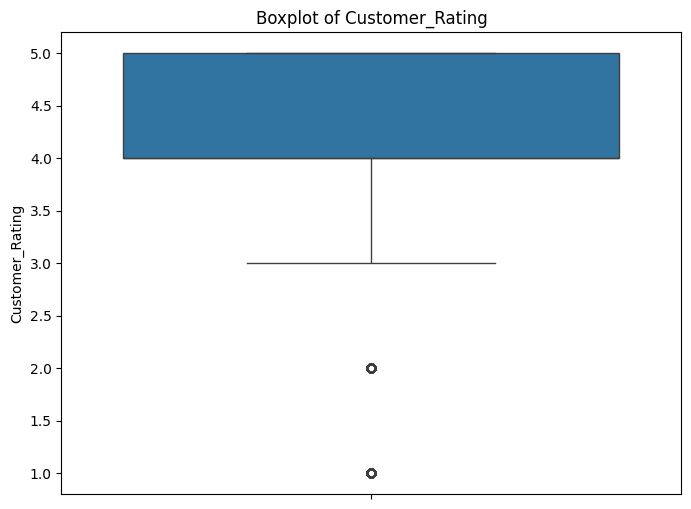

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Customer_Rating'])
plt.title('Boxplot of Customer_Rating')
plt.ylabel('Customer_Rating')
plt.show()

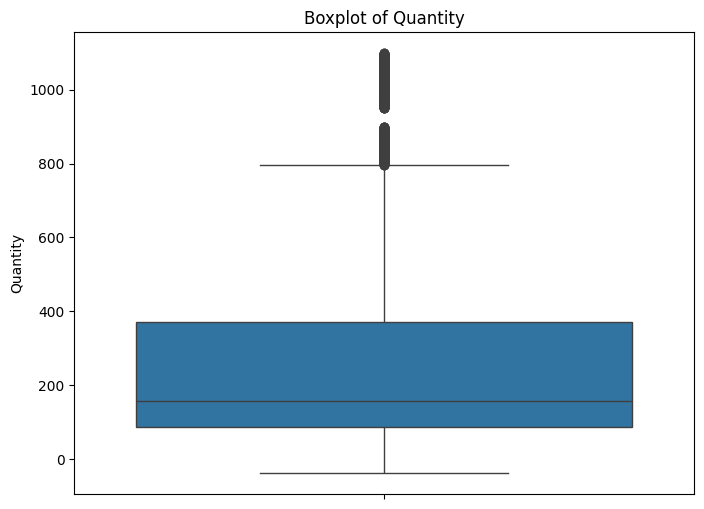

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Unit_Price'])
plt.title('Boxplot of Unit Price')
plt.ylabel('Unit Price')
plt.show()

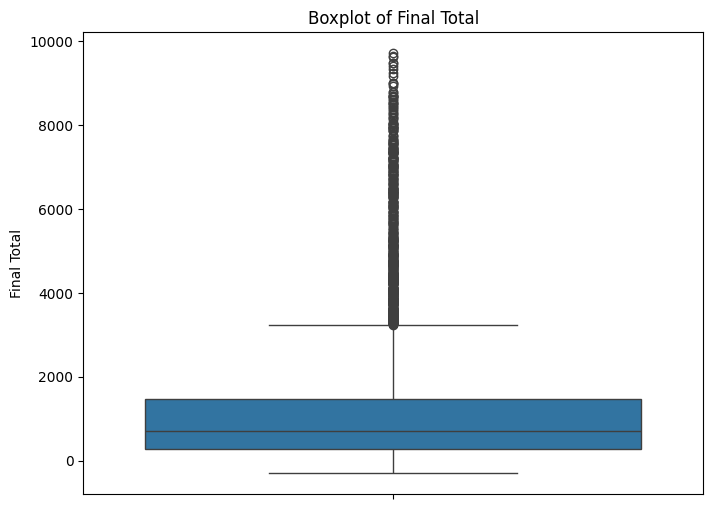

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Final_Total'])
plt.title('Boxplot of Final Total')
plt.ylabel('Final Total')
plt.show()

Dapat dilihat dari hasilnya pada kolom Customer_Rating, Unit_Price, Total_Price_Before_Discount, Discount_Amount, Price_After_Discount, Final_total memiliki jumlah outlier yang cukup tinggi. Hal ini menunjukkan adanya transaksi dengan nilai harganya atau final total yang jauh lebih besar dibandingkan mayoritas transaksi yang lain.

---



### Menyimpan Dataset (Bersih)


In [37]:
df.to_csv("[DatasetsClean]ecommerce_sales_dataset.csv", index=False)

# **EDA**

### Comparison

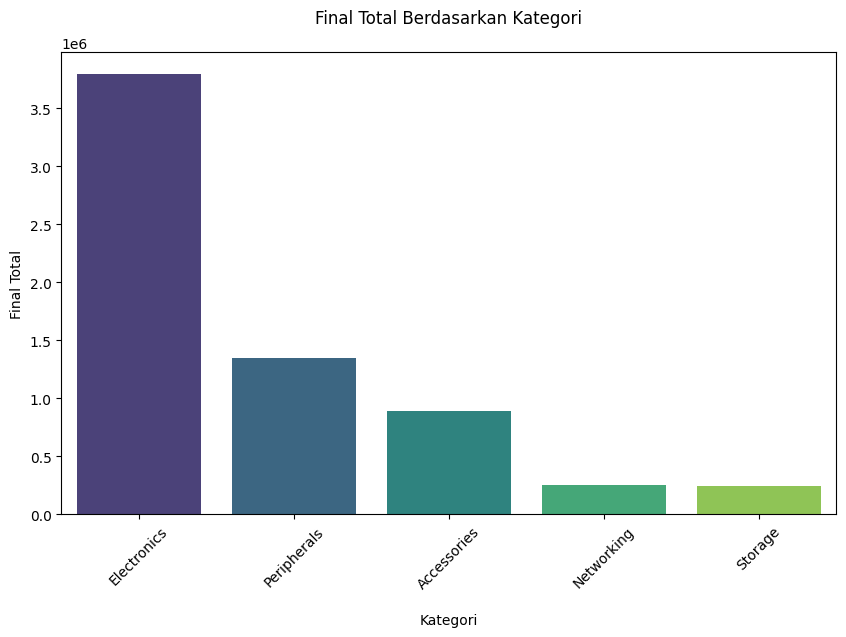

In [38]:
penjualan_market = df.groupby('Category')['Final_Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=penjualan_market.index, y=penjualan_market.values, palette='viridis', hue=penjualan_market.index, legend=False)
plt.title('Final Total Berdasarkan Kategori\n')
plt.xlabel('\nKategori')
plt.ylabel('Final Total')
plt.xticks(rotation=45)
plt.show()


Dapat dilihat dari grafik diatas menggambarkan perbandingan antar kategori berdasarkan jumlah final total. Dari grafik tersebut dapat dilihat perbandingannya bahwa kategori Electronics jauh lebih dominan dibandingkan kategori yang lain, hal ini menunjukkan besarnya ketimpangan penjualan berdasarkan kategori yang dimana kategori yang lain memiliki jumlah yang kecil.

---



### Composition

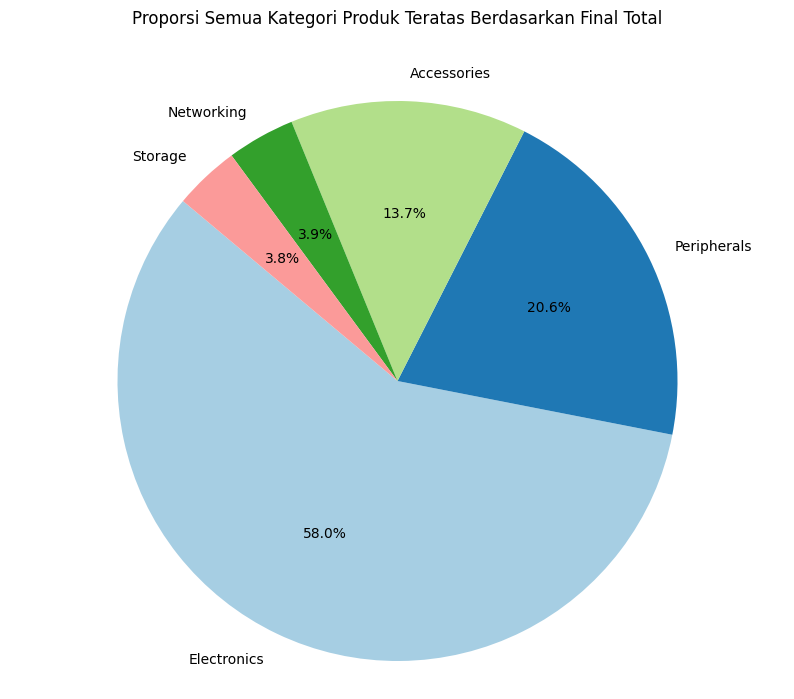

In [39]:
sales_by_category = df.groupby('Category')['Final_Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sales_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporsi Semua Kategori Produk Teratas Berdasarkan Final Total\n\n')
plt.ylabel('')
plt.axis('equal')
plt.show()


Dari komposisi grafik diatas menunjukkan bahwa pada kategori *Electronics* menyumbangkan lebih dari separuh dari final total nilai transaksi. Hal ini menunjukkan bahwa pendapatan dari datasets tersebut bergantung pada satu kategori utama, sedangkan yang lainnya hanya berkontribusi dalam proporsi yang kecil.

---



### Distribution

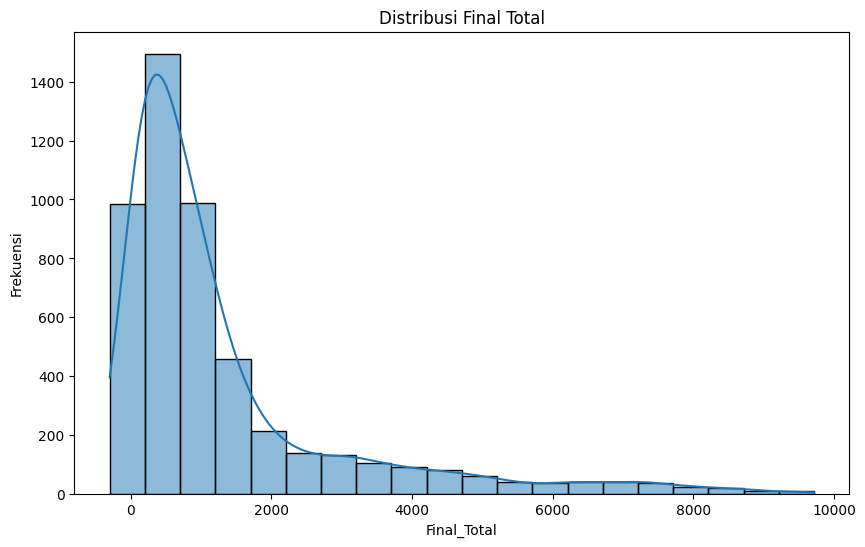

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Final_Total'], bins=20, kde=True)
plt.title('Distribusi Final Total')
plt.xlabel('Final_Total')
plt.ylabel('Frekuensi')
plt.show()


Dapat dilihat pada grafik histogram tersebut menunjukkan bahwa transaksi dengan nilai rendah jauh lebih tinggi dibandingkan transaksi bernilai tinggi.

---



### Relationship

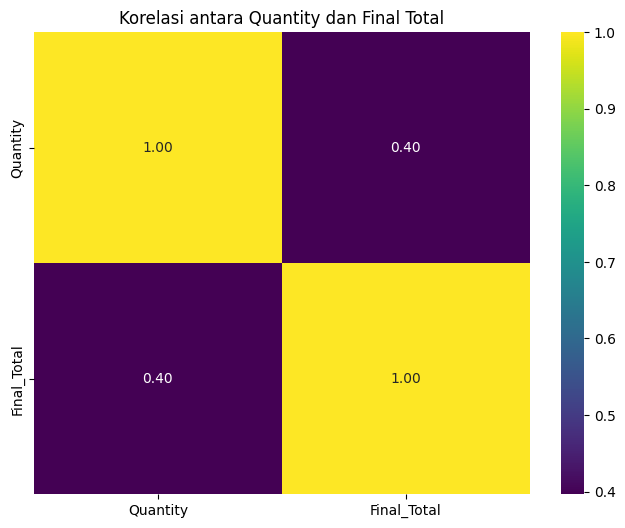

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['Quantity', 'Final_Total']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Korelasi antara Quantity dan Final Total')
plt.show()

Dapat dilihat korelasi dari quantity dan final total menunjukkan bahwa semakin banyak jumlah produk yang dibeli dalam satu transaksi, maka semakin besar nilai total transaksi yang membuat hubungan korelasi tersebut positif dan kuat.

---

